In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [3]:
data = pd.read_csv('data/orders.csv')
data

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [15]:
users_orders = data[['user_id', 'order_number', 'eval_set']]
users_orders = users_orders.loc[users_orders['eval_set'] != 'prior' ]
users_orders

,user_id,order_number,eval_set
10,1,11,train
25,2,15,train
38,3,13,test
44,4,6,test
49,5,5,train
...,...,...,...
3420933,206205,4,train
3421001,206206,68,test
3421018,206207,17,test
3421068,206208,50,test


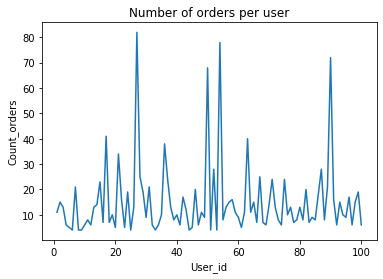

In [83]:
#График первых 100 пользователей и количества их заказов

plt.title('Number of orders per user')
plt.xlabel('User_id')
plt.ylabel('Count_orders')
plt.plot(users_orders['user_id'][:100], users_orders['order_number'][:100])

In [39]:
#Процент пропущенных значений в датасете 'orders.csv'

missing = data.loc[np.isnan(data['days_since_prior_order'])]
f'Percentage of missing values: {round(len(missing)/len(data) * 100, 3)}%'

'Percentage of missing values: 6.028%'

In [47]:
#Анализ пользователя с id=15(график заказов по времени)

user_15 = data.loc[data['user_id']==15]
user_15

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
130,2514324,15,prior,1,5,13,NaN
131,3135826,15,prior,2,6,12,15.0
132,2564002,15,prior,3,6,12,7.0
133,714991,15,prior,4,1,11,16.0
134,3317979,15,prior,5,4,15,17.0
135,876095,15,prior,6,5,11,8.0
136,2685110,15,prior,7,1,11,17.0
137,3119091,15,prior,8,2,17,8.0
138,887727,15,prior,9,2,13,7.0
139,2570697,15,prior,10,2,10,21.0


<BarContainer object of 24 artists>

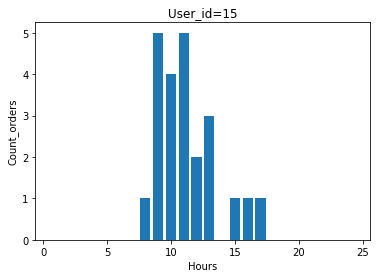

In [81]:
user_15_hours = list(user_15['order_hour_of_day'].values)
hours = [x for x in range(1, 25)]
count_hours = []
for hour in hours:
    count_hours.append(user_15_hours.count(hour))

plt.title('User_id=15')
plt.xlabel('Hours')
plt.ylabel('Count_orders')
plt.bar(hours, count_hours)

<BarContainer object of 24 artists>

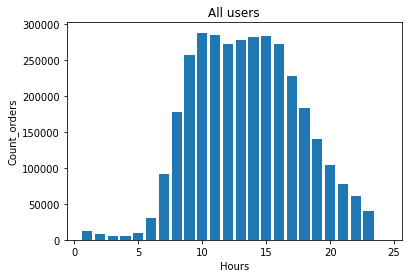

In [74]:
#Анализ всех пользователей и зависимость заказов от времени
users_hours = list(data['order_hour_of_day'].values)
count_hours = []

for hour in hours:
    count_hours.append(users_hours.count(hour))

plt.title('All users')
plt.xlabel('Hours')
plt.ylabel('Count_orders')
plt.bar(hours, count_hours)

In [ ]:
#Больше всего заказов в середине дня (10:00-16:00)

<BarContainer object of 7 artists>

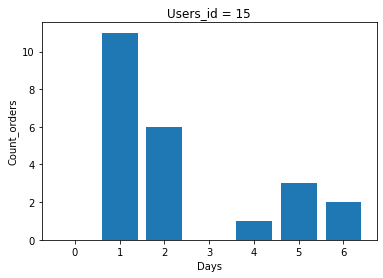

In [90]:
#Анализ пользователя с id=15(график заказов по дням недели)
user_15 = data.loc[data['user_id']==15]

users_days = list(user_15['order_dow'].values)
days = [x for x in range(0, 7)]
count_days = []

for day in days:
    count_days.append(users_days.count(day))

plt.title('Users_id = 15')
plt.xlabel('Days')
plt.ylabel('Count_orders')
plt.bar(days, count_days)

In [ ]:
#Юзер предпочитает закупаться в понедельник

<BarContainer object of 7 artists>

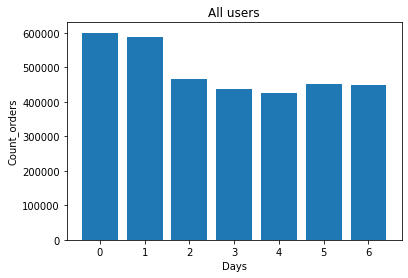

In [91]:
#Анализ всех пользователей и их заказы по дням недели

users_days = list(data['order_dow'].values)
count_days = []

for day in days:
    count_days.append(users_days.count(day))

plt.title('All users')
plt.xlabel('Days')
plt.ylabel('Count_orders')
plt.bar(days, count_days)

In [ ]:
#Больше всего заказов в воскресенье

In [125]:
#График зависимости покупаемых продуктов пользователя 15

orders_user_15 = list(user_15['order_id'].values)

df1 = pd.read_csv('data/order_products__prior.csv')
df2 = pd.read_csv('data/order_products__train.csv')
orders = df1.append(df2)

products = []
for order in orders_user_15:
    result = orders.loc[orders['order_id'] == order]
    result_list = list(result['product_id'].values)
    for x in result_list:
        products.append(x)
products = sorted(products)

In [166]:
count_products = []
unique_prod = []

for prod in products:
    if prod not in unique_prod:
        unique_prod.append(prod)
        count_products.append(products.count(prod))


In [165]:
data_prod = list(pd.read_csv('data/products.csv')['product_name'].values)

for i in range(len(unique_prod)):
     unique_prod[i] = data_prod[unique_prod[i]+1]
     print(f'{i+1}) {unique_prod[i]}={count_products[i]}')


1) Tzatziki Cucumber Sauce=5
2) Organic Letter of the Day Oatmeal Cinnamon Cookies=4
3) 2 in 1 Dandruff Shampoo + Conditioner with Almond Oil=8
4) Kick Ass Get Over It!=10
5) Hawaiian Aloha HE Liquid Detergent=10
6) Parchment Large Baking Cups - 60 CT=11
7) White Whole Mushrooms=8
8) Chocolate Covered Strawberries Ice Cream=1
9) Cocktail Mixer, Margarita=1
10) Gluten Free Raspberry Truffle Slim Bars=9
11) Organic Sugar Cookies=1
12) Medium Roasted Flavor Asada Verde Salsa=1
13) Tater Tots=3


In [ ]:
#Cамые частопокупаемые позиции у юзера 15:
#-Parchment Large Baking Cups - 60
#-Hawaiian Aloha HE Liquid Detergent
#-Kick Ass Get Over It!
